In [603]:
import yfinance as yf
import pandas as pd
import numpy as np
import math
import itertools


#Strategies[tuple(sorted(('BITO', )))]

# List of stock tickers
tickers = ['NVDL', 'BITX', 'BITO', 'FNGU', 'UPRO', 'SPMO']#, 'BULZ', 'TQQQ', 'SMH', 'XMMO', 'EPI'#, 'QDV5' # tickers = ['VOO', 'IVV',  'SPLG', 'SPY']#, 'BITX', 'NVDL'

start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2024-07-01')
dfGlobalOpen = pd.DataFrame(columns = ['Date'])

Strategies = {}
dfGlobal = []
globalMap = {}
combinations = []

#Assume purchased shares on Daily Open
#Value based on value at open
cash = 1000
transactionFee = 10

for splits in range(0, 3):
#for splits in range(1, len(tickers)):
    combinations.extend([tuple(sorted(i)) for i in list(itertools.combinations(tickers, splits))])


for ticker in tickers:
    data = yf.download(ticker, start="2020-01-10", end="2024-07-01")
    data['Open'] = np.ceil(data['Open']*100)/100
    data = data.rename(columns = {'Open': ticker + ' Open'})
    globalMap[ticker] = data.reset_index()
    dfGlobalOpen = dfGlobalOpen.merge(globalMap[ticker][['Date', ticker + ' Open']], on = 'Date', how = 'outer')

Strategies[combinations[0]] = pd.DataFrame(columns = ['Date'])
for x in combinations:
    Strategies[x] = pd.DataFrame(columns = ['Date'])
    Strategies[x] = Strategies[x].merge(dfGlobalOpen[['Date'] + [i + ' Open' for i in x]], on = 'Date', how = 'outer')
    Strategies[x].dropna(inplace = True)
    
    #Strategies[x]['Cash'] = cash when date is the 15th of the month
    Strategies[x]['Investment'] = 0
    Strategies[x]['Investment'] = np.where(Strategies[x]['Date'].dt.day == 15, cash, 0)
    Strategies[x]['Cumulative Investment'] = Strategies[x]['Investment'].cumsum()

    splits = (len(Strategies[x].columns) - 3)
    #Caluculate number of shares owned for an even split of each available stock
    for tickerNames in x:
        Strategies[x][tickerNames + ' Cumulative Shares'] = np.floor(np.where((Strategies[x]['Investment']) != 0, (Strategies[x]['Investment']), 0)/Strategies[x][tickerNames + ' Open']/splits).cumsum()
        #Total Value of all shares
        Strategies[x][tickerNames + ' Total Value'] = Strategies[x][tickerNames + ' Cumulative Shares']*Strategies[x][tickerNames + ' Open']

    Strategies[x]['Total Value'] = Strategies[x].filter(like = 'Total Value').sum(axis = 1)
    #Drop all columns that contain ' Total Value' in name
    Strategies[x] = Strategies[x].drop(Strategies[x].filter(like = ' Total Value').columns, axis = 1)

    Strategies[x]['% Gain on Investment'] = (Strategies[x]['Total Value']-Strategies[x]['Cumulative Investment'])/Strategies[x]['Cumulative Investment']
    Strategies[x]['Annualized % Gain on Investment'] = (Strategies[x]['Date'].iloc[-1] - Strategies[x]['Date'].iloc[0]).days/365*Strategies[x]['% Gain on Investment']
    Strategies[x].drop(columns = '% Gain on Investment', inplace = True)




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [600]:
#Strategies[tuple(sorted((('BITO', 'BITX', 'FNGU', 'SPMO'))))][33:]

#find the strategy with the lowest final '% Gain on Investment'
minValue = 100
minKey = ()
for key, value in Strategies.items():
    if value['Annualized % Gain on Investment'].iloc[-1] < minValue:
        minValue = value['Annualized % Gain on Investment'].iloc[-1]
        minKey = key

Strategies[tuple(sorted((minKey)))]
#print((Strategies[tuple(sorted((minKey)))]['Date'].iloc[-1] - Strategies[tuple(sorted((minKey)))]['Date'].iloc[0]).days)#


,Date,BITO Open,BITX Open,FNGU Open,SPMO Open,Investment,Cumulative Investment,BITO Cumulative Shares,BITX Cumulative Shares,FNGU Cumulative Shares,SPMO Cumulative Shares,Total Value,Annualized % Gain on Investment
870,2023-06-27,17.19,15.57,171.00,54.94,0,0,0.0,0.0,0.0,0.0,0.00,NaN
871,2023-06-28,16.93,15.02,174.06,55.03,0,0,0.0,0.0,0.0,0.0,0.00,NaN
872,2023-06-29,17.30,15.53,183.39,55.00,0,0,0.0,0.0,0.0,0.0,0.00,NaN
873,2023-06-30,17.46,15.89,184.31,55.69,0,0,0.0,0.0,0.0,0.0,0.00,NaN
874,2023-07-03,16.48,15.36,191.04,56.03,0,0,0.0,0.0,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,2024-06-24,23.04,34.37,424.30,87.14,0,8000,93.0,87.0,4.0,27.0,9182.89,0.148671
1120,2024-06-25,23.07,33.28,413.05,86.66,0,8000,93.0,87.0,4.0,27.0,9032.89,0.129819
1121,2024-06-26,23.16,33.53,423.58,87.28,0,8000,93.0,87.0,4.0,27.0,9121.87,0.141002
1122,2024-06-27,23.18,33.62,446.67,87.74,0,8000,93.0,87.0,4.0,27.0,9236.34,0.155389


C:\Users\Samuel Lim\AppData\Local\Temp\ipykernel_27136\2078747249.py:4: MatplotlibDeprecationWarning: Passing label as a length 0 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(Strategies[x]['Date'], Strategies[x]['Annualized % Gain on Investment'], label = x)
C:\Users\Samuel Lim\AppData\Local\Temp\ipykernel_27136\2078747249.py:4: MatplotlibDeprecationWarning: Passing label as a length 2 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(Strategies[x]['Date'], Strategies[x]['Annualized % Gain on Investment'], label = x)


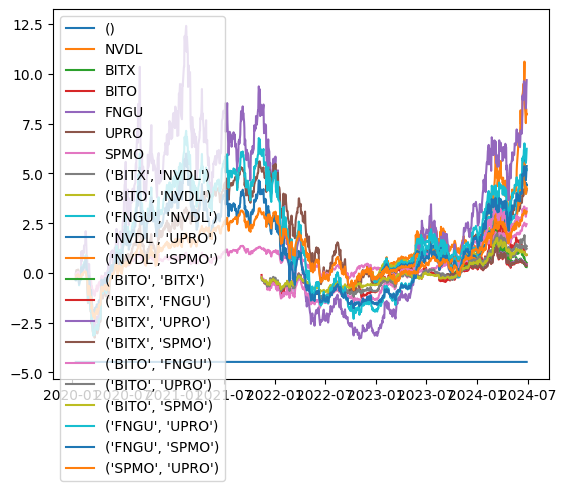

In [604]:

#Graph all '% Gain on Investment' for each strategy onto a single graph
import matplotlib.pyplot as plt
for x in combinations:
    plt.plot(Strategies[x]['Date'], Strategies[x]['Annualized % Gain on Investment'], label = x)
    plt.legend()




#Strategies[tuple(sorted(('BITO','BITX')))]

#len(Strategies[tuple(sorted(('BITO','BITX')))].columns)-1


In [ ]:
import matplotlib.pyplot as plt
# import seaborn as sns


#graph profits of each stock
for ticker in tickers:
    data = globalMap[ticker]
    plt.plot(data['Date'], data['Profit %'], label=ticker)
    plt.legend(labels=tickers)
    plt.xlabel('Date')
    plt.ylabel('Profit %')


#globalMap['NVDL']

In [ ]:
#pcp and black scholes